In [ ]:
#let's start by installing the textractor library 
!pip install amazon-textract-textractor

In [82]:
#import required packages 
import os
from PIL import Image
from textractor import Textractor
from textractor.visualizers.entitylist import EntityList
from textractor.data.constants import TextractFeatures, Direction, DirectionalFinderType

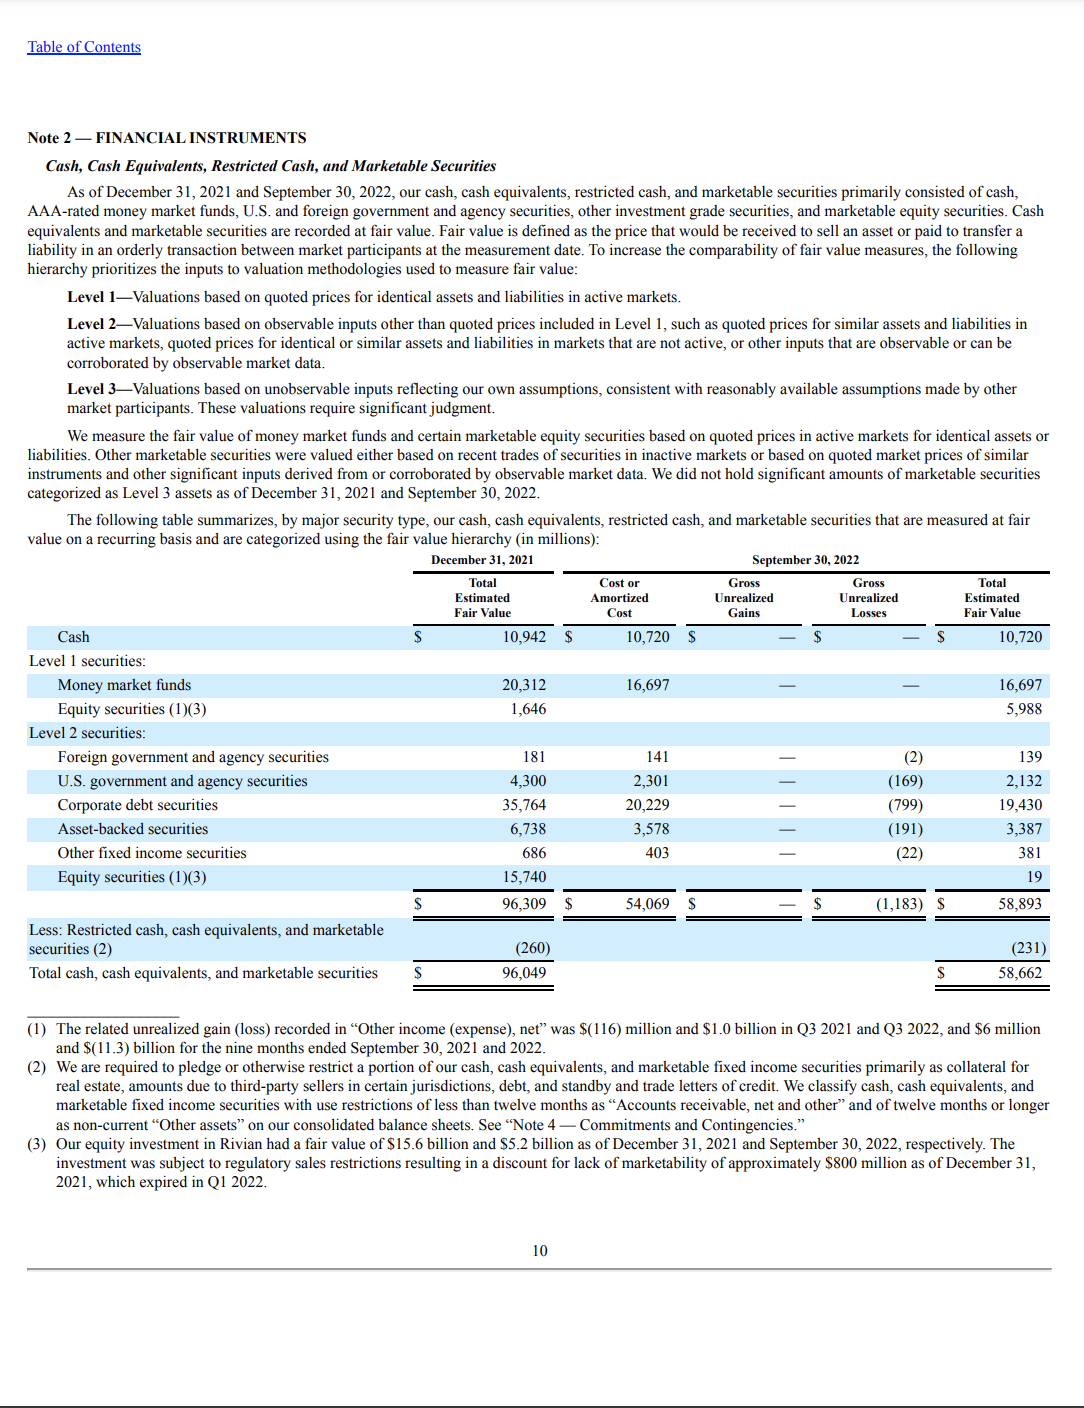

In [83]:
#see the image
image = Image.open("sec_filing.png")
image

In [84]:
#running the textractor extraction call
extractor = Textractor(region_name="us-east-1")

document = extractor.analyze_document(
    file_source=image,
    features=[TextractFeatures.TABLES],
    save_image=True
)

In [85]:
document

This document holds the following data:
Pages - 1
Words - 658
Lines - 122
Key-values - 0
Checkboxes - 0
Tables - 1
Queries - 0
Signatures - 0
Identity Documents - 0
Expense Documents - 0

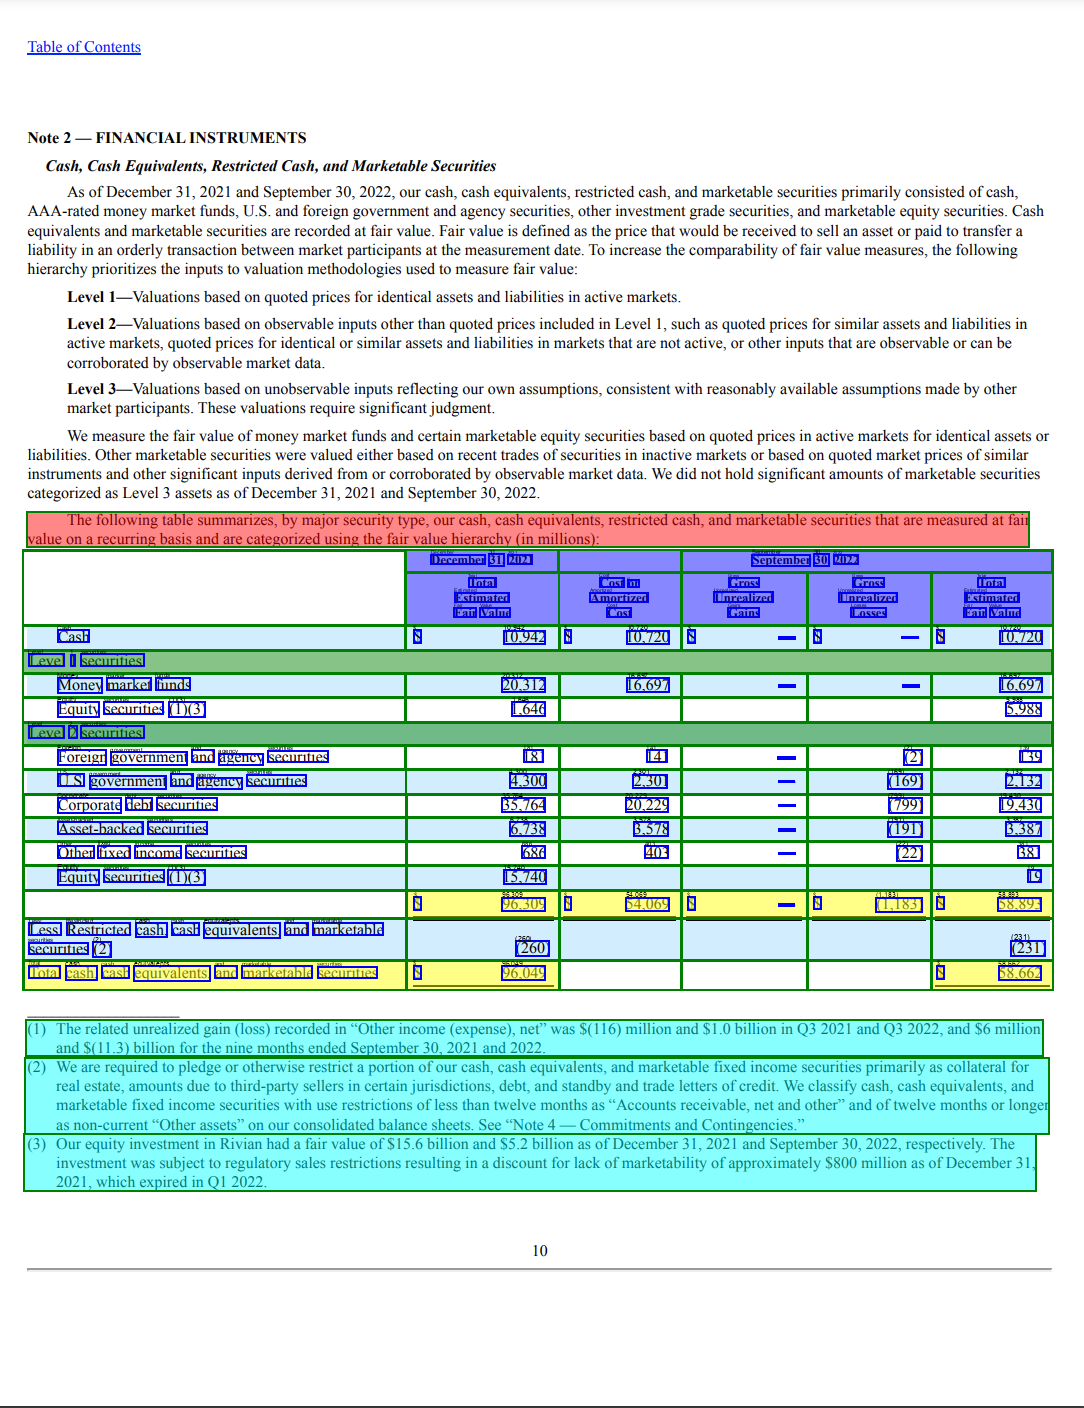

In [86]:
table = EntityList(document.tables[0])
document.tables[0].visualize()

In [87]:
table_title = table[0].title.text
table_title

'The following table summarizes, by major security type, our cash, cash equivalents, restricted cash, and marketable securities that are measured at fair value on a recurring basis and are categorized using the fair value hierarchy (in millions):'

In [88]:
table_footers = table[0].footers
for footers in table_footers:
    print (footers.text)

(2) We are required to pledge or otherwise restrict a portion of our cash, cash equivalents, and marketable fixed income securities primarily as collateral for real estate, amounts due to third-party sellers in certain jurisdictions, debt, and standby and trade letters of credit. We classify cash, cash equivalents, and marketable fixed income securities with use restrictions of less than twelve months as "Accounts receivable, net and other" and of twelve months or longer as non-current "Other assets" on our consolidated balance sheets. See "Note 4 - Commitments and Contingencies."
(1) The related unrealized gain (loss) recorded in "Other income (expense), net" was $(116) million and $1.0 billion in Q3 2021 and Q3 2022, and $6 million and $(11.3) billion for the nine months ended September 30, 2021 and 2022.
(3) Our equity investment in Rivian had a fair value of $15.6 billion and $5.2 billion as of December 31, 2021 and September 30, 2022, respectively. The investment was subject to re

In [111]:
table_type = table[0].get_cells_by_type()
table_type

{'December 31, 2021': [<Cell: (1,2), Span: (1, 1), Column Header: True, MergedCell: False>  December 31, 2021],
 '': [<Cell: (1,3), Span: (1, 1), Column Header: True, MergedCell: False>  ],
 'September 30, 2022': [<Cell: (1,4), Span: (1, 1), Column Header: True, MergedCell: True>  September 30, 2022  ,
  <Cell: (1,5), Span: (1, 1), Column Header: True, MergedCell: True>  September 30, 2022  ,
  <Cell: (1,6), Span: (1, 1), Column Header: True, MergedCell: True>  September 30, 2022  ],
 'Total Estimated Fair Value': [<Cell: (2,6), Span: (1, 1), Column Header: True, MergedCell: False>  Total Estimated Fair Value],
 'Cost or Amortized Cost': [<Cell: (2,3), Span: (1, 1), Column Header: True, MergedCell: False>  Cost or Amortized Cost],
 'Gross Unrealized Gains': [<Cell: (2,4), Span: (1, 1), Column Header: True, MergedCell: False>  Gross Unrealized Gains],
 'Gross Unrealized Losses': [<Cell: (2,5), Span: (1, 1), Column Header: True, MergedCell: False>  Gross Unrealized Losses]}

In [112]:
table[0].to_excel(filepath="sec_filing.xlsx")

In [113]:
table[0].to_pandas()

,0,1,2,3,4,5
0,,"December 31, 2021",,September,"30, 2022",
1,,Total Estimated Fair Value,Cost or Amortized Cost,Gross Unrealized Gains,Gross Unrealized Losses,Total Estimated Fair Value
2,Cash,"$ 10,942","$ 10,720",$ -,$ -,"$ 10,720"
3,Level 1 securities:,,,,,
4,Money market funds,"20,312","16,697",-,-,"16,697"
5,Equity securities (1)(3),"1,646",,,,"5,988"
6,Level 2 securities:,,,,,
7,Foreign government and agency securities,181,141,-,(2),139
8,U.S. government and agency securities,"4,300","2,301",-,(169),"2,132"
9,Corporate debt securities,"35,764","20,229",-,(799),"19,430"


In [114]:
table[0].to_csv()

',0,1,2,3,4,5\n0,,"December 31, 2021",,September,"30, 2022",\n1,,Total Estimated Fair Value,Cost or Amortized Cost,Gross Unrealized Gains,Gross Unrealized Losses,Total Estimated Fair Value\n2,Cash,"$ 10,942","$ 10,720",$ -,$ -,"$ 10,720"\n3,Level 1 securities:,,,,,\n4,Money market funds,"20,312","16,697",-,-,"16,697"\n5,Equity securities (1)(3),"1,646",,,,"5,988"\n6,Level 2 securities:,,,,,\n7,Foreign government and agency securities,181,141,-,(2),139\n8,U.S. government and agency securities,"4,300","2,301",-,(169),"2,132"\n9,Corporate debt securities,"35,764","20,229",-,(799),"19,430"\n10,Asset-backed securities,"6,738","3,578",-,(191),"3,387"\n11,Other fixed income securities,686,403,-,(22),381\n12,Equity securities (1)(3),"15,740",,,,19\n13,,"$ 96,309","$ 54,069",$ -,"$ (1,183)","$ 58,893"\n14,"Less: Restricted cash, cash equivalents, and marketable securities (2)",(260),,,,(231)\n15,"Total cash, cash equivalents, and marketable securities","$ 96,049",,,,"$ 58,662"\n'